In [1]:

import seaborn as sns
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
from matplotlib.colors import LinearSegmentedColormap


In [2]:
heatmaps = []
with open(Path.cwd() / "max_rs_heatmap.csv") as csvfile: 
    reader_csv = csv.reader(csvfile)
    i = 0
    for row in reader_csv:
        if i == 0:
            i += 1
            continue
        else:
            heatmaps.append(row)

In [3]:
heatmap_vals = np.array(heatmaps, dtype=float)

In [4]:
L_ratios = []
with open(Path.cwd() / "L_ratios.csv") as csvfile: 
    reader_csv = csv.reader(csvfile)
    i = 0
    for row in reader_csv:
        if i == 0:
            i += 1
            continue
        else:
            L_ratios.append(row[0])

In [5]:
Lratio_vals = np.array(L_ratios, dtype=float)

In [6]:
inhibs = []
with open(Path.cwd() / "inhib_shutoff_s.csv") as csvfile: 
    reader_csv = csv.reader(csvfile)
    i = 0
    for row in reader_csv:
        if i == 0:
            i += 1
            continue
        else:
            inhibs.append(row[0])

In [7]:
inhib_vals = np.array(inhibs, dtype=float)

In [8]:
beta_vals = []
with open(Path.cwd() / "beta_heatmap.csv") as csvfile: 
    reader_csv = csv.reader(csvfile)
    i = 0
    for row in reader_csv:
        if i == 0:
            i += 1
            continue
        else:
            beta_vals.append(row)

In [9]:
beta_vals_ar = np.array(beta_vals, dtype=float)

In [10]:
beta_vals_ar

array([[ 0.405 ,  0.5265,  1.352 , ..., 13.583 , 14.0165, 14.45  ],
       [ 0.125 ,  1.8785,  1.352 , ..., 13.583 , 14.0165, 14.45  ],
       [ 0.125 ,  0.1625,  1.352 , ..., 13.583 , 14.0165, 14.45  ],
       ...,
       [ 0.18  ,  0.65  ,  0.288 , ..., 15.228 , 15.714 , 16.2   ],
       [ 0.18  ,  0.65  ,  0.288 , ..., 15.228 , 15.714 , 16.2   ],
       [ 1.62  ,  0.65  ,  0.288 , ..., 15.228 , 15.714 , 16.2   ]])

In [67]:
num_ticks = 7
# the index of the position of yticks
yticks = np.linspace(0, len(inhib_vals) - 1, num_ticks, dtype=int)
# the content of labels of these yticks
yticklabels = [round(inhib_vals[idx],1) for idx in yticks]

In [68]:
# the index of the position of yticks
xticks = np.linspace(0, len(Lratio_vals) - 1, num_ticks, dtype=int)
# the content of labels of these yticks
xticklabels = [round(Lratio_vals[idx]) for idx in xticks]

In [69]:
colors = ['red', 'white', '#947CB3']
cm = LinearSegmentedColormap.from_list(
        'yes', colors)

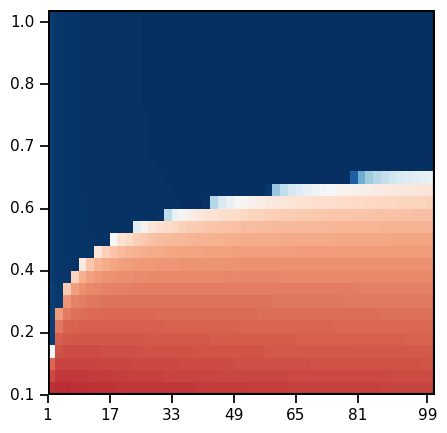

In [70]:

sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2, 'font.family': ['arial'], 'axes.linewidth':2})
plt.subplots(figsize=(5,5))
ax = sns.heatmap(np.transpose(heatmap_vals), xticklabels=xticklabels, cbar=False, 
                 cmap='RdBu', vmin=0, vmax=500)

#plt.contour(np.transpose(beta_vals_ar),levels=[5.5],linewidths=3, colors='lightblue')
plt.gca().invert_yaxis()
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels, rotation='horizontal')
ax.set_xticklabels(xticklabels)
plt.xticks(rotation=0)

# Drawing the frame
ax.axhline(y = 0, color='k',linewidth = 3)
ax.axhline(y = heatmap_vals.shape[1], color = 'k',linewidth = 3)
ax.axvline(x = 0, color = 'k',linewidth = 2)
ax.axvline(x = heatmap_vals.shape[0],color = 'k', linewidth = 3)
plt.savefig("hill_335_L0L1ratio-screen_heatmap_beta.png", dpi = 500, bbox_inches='tight')